In [14]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import calendar
import random
import statistics

pd.options.display.max_columns = None
pd.options.display.max_rows = None
warnings.filterwarnings('ignore')

os.chdir("E:/Trinity/Dissertation/Sem 3/models/data/") 

In [17]:
files = glob.glob("F:/counterData/*.csv")
count = []
for i in range(0,20):
    print("\rIteration - " + str(i), end='')
    num = random.randint(1,len(files))
    ctr = pd.read_csv(files[num])
    ctr = ctr[(ctr["cosit"]==1508) & (ctr["lanename"].str.startswith("Southbound")) & (ctr["classname"] == 'BUS')]
    count.append(len(ctr))

    
statistics.mean(count)

#ctr = pd.read_csv('F:/counterData\\2019-01-03.csv')

Iteration - 19

429.95

In [20]:
#Vehicle types based on class id
def addVehicleType(vehicleclassid):
    if vehicleclassid in (6,16,19,59,74,77,85,90,96,98,105):
        return "Motor Cycle"
    elif vehicleclassid in (1,10,11,28,40,47,50,52,65,66,69,80,100,101):
        return "Motor Car"
    elif vehicleclassid in (2,12,20,29,30,44,45,68,70,76,81,86,107):
        return "Bus (L)"
    elif vehicleclassid in (3,13,21,54,55,57,78,79,82,87,108):
        return "Bus (H)"
    elif vehicleclassid in (4,14,22,31,32,37,49,51,64,71,83,92,99,104):
        return "LGV"
    elif vehicleclassid in (7,15,23,33,34,41,42,46,67,72,84,88,94):
        return "HGV (2 Axles)"
    elif vehicleclassid in (8,17,24,56,58,60,61,75,95,102):
        return "HGV (3 Axles)"
    elif vehicleclassid in (5,18,25,35,36,38,43,48,53,73,97):
        return "HGV (4 Axles)"
    else:
        return "NA" 

In [26]:
xls = pd.ExcelFile('E:/Trinity/Dissertation/Sem 3/Columns.xlsx')
col_names = list(pd.read_excel(xls).columns)
files = glob.glob("*.csv")
count = []
for i in range(0,20):
    num = random.randint(1,len(files))
    print("\rIteration - " + str(i) + "   Filename - " + str(files[num]), end='')
    data = pd.read_csv(files[num], names = col_names)
    data["vehicleType"] = data["vehicleclassid"].apply(addVehicleType)
    data = data[(data["entryplazaid"]==1420) & (data["vehicleType"].str.startswith("Bus"))]
    count.append(len(data))

    
statistics.mean(count)

#ctr = pd.read_csv('F:/counterData\\2019-01-03.csv')

Iteration - 19   Filename - 2020-04-10.csv

107.15

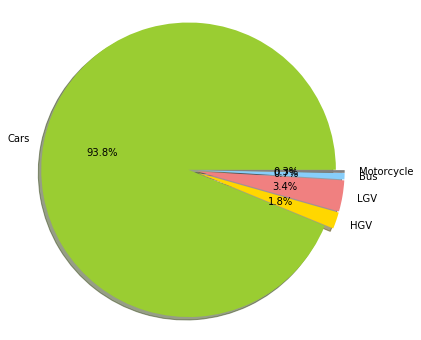

In [69]:
#sizes = [4500, 997, 74, 112, 6]
sizes = [34337, 664, 1247, 253, 108]
labels = ["Cars", "HGV", "LGV", "Bus", "Motorcycle"]
colors = ['yellowgreen','gold','lightcoral', 'lightskyblue', 'gray']
explode = (0.01, 0.05, 0.05, 0.05, 0.05)  # explode 1st slice
plt.figure(figsize=(6,6)) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)

plt.axis('equal')
plt.show()